In [2]:
import pandas as pd

In [3]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")

# Basic Information

In [63]:
titanic_data.shape


(891, 12)

In [64]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This DataFrame contains 891 passenger records with 12 features capturing demographic, travel, and survival information. Most columns are complete, but Age, Cabin, and Embarked have missing values, with Cabin being largely sparse. The dataset includes a mix of numerical and categorical variables, making it suitable for exploratory analysis and survival prediction tasks.

In [65]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Special information


In [66]:
titanic_data[["Age","Fare"]].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [67]:
titanic_data[["Age","Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [68]:
titanic_data[["Age","Fare"]].mode()

,Age,Fare
0,24.0,8.05


In [69]:
titanic_data[["Age","Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Description:

Average age of passengers is approximately 29.7 years, indicating that most passengers were relatively young.

Age distribution is fairly symmetric, as the mean (29.7) and median (28.0) are close.

The minimum age is 0.42 years (about 5 months), and the oldest passenger is 80 years old.

There are missing values in the Age column (714 entries vs. 891 for Fare), suggesting some age data is not available.

For Fare, the mean is 32.20 and the median is 14.45 — a large gap indicating a right-skewed (positively skewed) distribution.

Fare values range from 0 (free tickets) to over 512, showing a wide spread and presence of outliers or high-paying passengers.

The high standard deviation (49.69) also supports the presence of large variability in fare prices

In [70]:
titanic_data.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

In [71]:
titanic_data['Embarked'].value_counts(dropna = False, normalize=True) *100

Embarked
S      72.278339
C      18.855219
Q       8.641975
NaN     0.224467
Name: proportion, dtype: float64

In [72]:
titanic_data.value_counts(["Sex","Survived"],normalize = True) *100

Sex     Survived
male    0           52.525253
female  1           26.150393
male    1           12.233446
female  0            9.090909
Name: proportion, dtype: float64

Interestingly, death rate of male population is double the survival rate of female counterparts.

In [73]:
titanic_data[titanic_data["Sex"]=="female"].value_counts("Survived",normalize=True) *100

Survived
1    74.203822
0    25.796178
Name: proportion, dtype: float64

In [9]:
# Embarked from S and gender Male , Survival rate ?
titanic_data[
    (titanic_data.Embarked=="S") & 
    (titanic_data["Sex"]=="male")
    ].value_counts("Survived")

Survived
0    364
1     77
Name: count, dtype: int64

In [11]:
pd.crosstab(
    titanic_data.Sex,
    titanic_data.Survived,
    margins= True,
    margins_name= "Total"
        
)

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


In [16]:
pd.crosstab(
    [titanic_data.Embarked,titanic_data.Pclass],
    [titanic_data.Sex,titanic_data.Survived],
    margins = True
)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

In [5]:
# Get unique value
titanic_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
titanic_data["Embarked"].nunique(dropna=False)

4

In [10]:
# sum() , prod(), cumsum(), var(), std(), mean(), quantile()
titanic_data.Age.quantile(q=0.75)

np.float64(38.0)

In [12]:
titanic_data.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 # 0 -> column wise -> vertival
 # 1 -> row wise -> horizontal

In [13]:
# GroupBy

In [17]:
group_by_gender = titanic_data[["Sex","Fare","Age","Survived"]].groupby(by = "Sex")
group_by_gender

In [18]:
group_by_gender.mean()

,Fare,Age,Survived
Sex,,,
female,44.479818,27.915709,0.742038
male,25.523893,30.726645,0.188908


In [20]:
group_by_gender.value_counts(["Survived"])

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [21]:
group_by_gender.sum()

,Fare,Age,Survived
Sex,,,
female,13966.6628,7286.00,233
male,14727.2865,13919.17,109


In [24]:
group_by_two = titanic_data.groupby(by = ["Embarked","Survived"])

In [26]:
group_by_two.mean(numeric_only=True)

PassengerId    Pclass        Age     SibSp     Parch  \
Embarked Survived                                                         
C        0          409.853333  2.200000  33.666667  0.253333  0.253333   
         1          473.989247  1.634409  28.973671  0.494624  0.451613   
Q        0          480.404255  2.936170  30.325000  0.510638  0.276596   
         1          319.966667  2.866667  22.500000  0.300000  0.000000   
S        0          449.868852  2.545667  30.203966  0.611241  0.348946   
         1          448.857143  1.967742  28.113184  0.493088  0.539171   

                        Fare  
Embarked Survived             
C        0         35.443335  
         1         79.720926  
Q        0         13.335904  
         1         13.182227  
S        0         20.743987  
         1         39.547081

In [30]:
## Correlation and Covariance
titanic_data[["Age","Fare"]].cov()

,Age,Fare
Age,211.019125,73.849030
Fare,73.849030,2469.436846


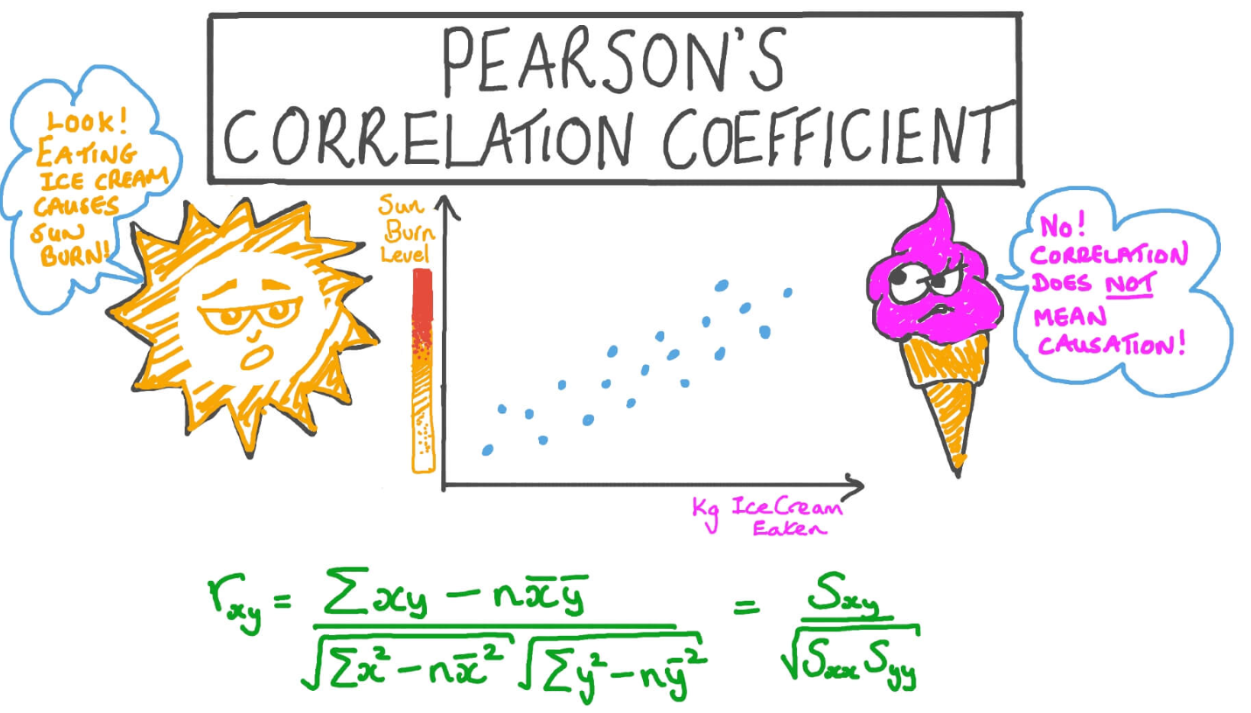

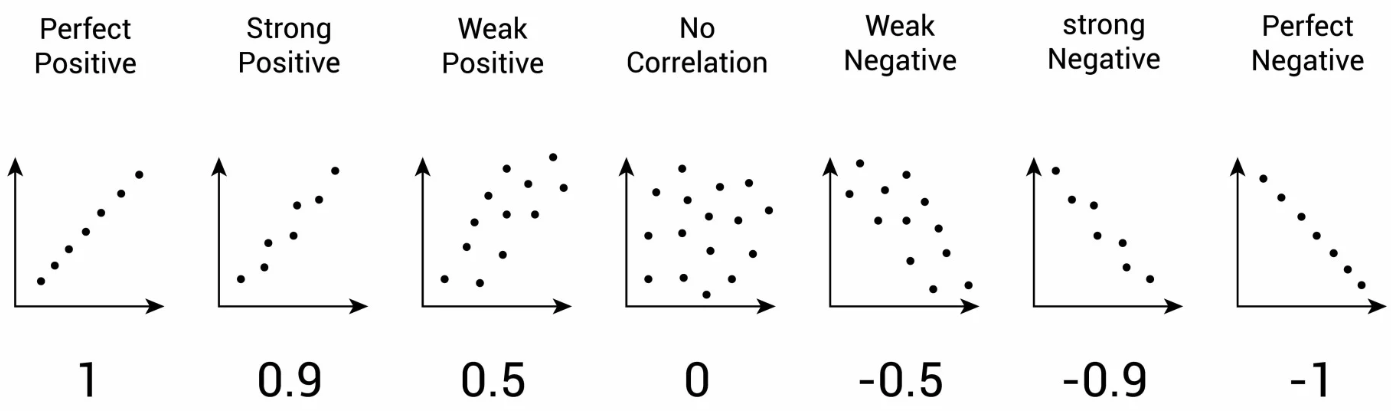

In [33]:
titanic_data[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


-1 , -0.5, 0 , 0.5, 1

0.096 > no correlation

In [35]:
initials = [ data.split(",")[-1].split(".")[0] for data in titanic_data.Name]

In [37]:
titanic_data["Initials"] = initials

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
